In [45]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
url='https://www.worldometers.info/gdp/gdp-by-country/'
url

'https://www.worldometers.info/gdp/gdp-by-country/'

In [47]:
#check the response of webpage
response=requests.get(url)
response

<Response [200]>

#if there is clear table in webside we can directly extract table using pandas

In [48]:
#read the table directly using pandas read_html
table=pd.read_html(url)
table

[       #              Country GDP  (nominal, 2022)    GDP  (abbrev.)  \
 0      1        United States  $25,462,700,000,000  $25.463 trillion   
 1      2                China  $17,963,200,000,000  $17.963 trillion   
 2      3                Japan   $4,231,140,000,000   $4.231 trillion   
 3      4              Germany   $4,072,190,000,000   $4.072 trillion   
 4      5                India   $3,385,090,000,000   $3.385 trillion   
 ..   ...                  ...                  ...               ...   
 172  173  Sao Tome & Principe         $546,680,342      $547 million   
 173  174           Micronesia         $427,094,119      $427 million   
 174  175     Marshall Islands         $279,667,900      $280 million   
 175  176             Kiribati         $223,352,943      $223 million   
 176  177               Tuvalu          $60,349,391       $60 million   
 
     GDP growth  Population  (2022) GDP per capita Share of  World GDP  
 0        2.06%           341534046        $74,55

In [49]:
#assign table in df
df=table[0]
df

,#,Country,"GDP (nominal, 2022)",GDP (abbrev.),GDP growth,Population (2022),GDP per capita,Share of World GDP
0,1,United States,"$25,462,700,000,000",$25.463 trillion,2.06%,341534046,"$74,554",25.32%
1,2,China,"$17,963,200,000,000",$17.963 trillion,2.99%,1425179569,"$12,604",17.86%
2,3,Japan,"$4,231,140,000,000",$4.231 trillion,1.03%,124997578,"$33,850",4.21%
3,4,Germany,"$4,072,190,000,000",$4.072 trillion,1.79%,84086227,"$48,429",4.05%
4,5,India,"$3,385,090,000,000",$3.385 trillion,7.00%,1425423212,"$2,375",3.37%
...,...,...,...,...,...,...,...,...
172,173,Sao Tome & Principe,"$546,680,342",$547 million,0.93%,226305,"$2,416",0.00%
173,174,Micronesia,"$427,094,119",$427 million,-0.62%,523477,$816,0.00%
174,175,Marshall Islands,"$279,667,900",$280 million,1.50%,40077,"$6,978",0.00%
175,176,Kiribati,"$223,352,943",$223 million,1.56%,130469,"$1,712",0.00%


In [50]:
#rename column name # to rank
df.rename(columns={'#': 'Rank'}, inplace=True)
df

,Rank,Country,"GDP (nominal, 2022)",GDP (abbrev.),GDP growth,Population (2022),GDP per capita,Share of World GDP
0,1,United States,"$25,462,700,000,000",$25.463 trillion,2.06%,341534046,"$74,554",25.32%
1,2,China,"$17,963,200,000,000",$17.963 trillion,2.99%,1425179569,"$12,604",17.86%
2,3,Japan,"$4,231,140,000,000",$4.231 trillion,1.03%,124997578,"$33,850",4.21%
3,4,Germany,"$4,072,190,000,000",$4.072 trillion,1.79%,84086227,"$48,429",4.05%
4,5,India,"$3,385,090,000,000",$3.385 trillion,7.00%,1425423212,"$2,375",3.37%
...,...,...,...,...,...,...,...,...
172,173,Sao Tome & Principe,"$546,680,342",$547 million,0.93%,226305,"$2,416",0.00%
173,174,Micronesia,"$427,094,119",$427 million,-0.62%,523477,$816,0.00%
174,175,Marshall Islands,"$279,667,900",$280 million,1.50%,40077,"$6,978",0.00%
175,176,Kiribati,"$223,352,943",$223 million,1.56%,130469,"$1,712",0.00%


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Rank                  177 non-null    int64 
 1   Country               177 non-null    object
 2   GDP  (nominal, 2022)  177 non-null    object
 3   GDP  (abbrev.)        177 non-null    object
 4   GDP growth            177 non-null    object
 5   Population  (2022)    177 non-null    int64 
 6   GDP per capita        177 non-null    object
 7   Share of  World GDP   177 non-null    object
dtypes: int64(2), object(6)
memory usage: 11.2+ KB


In [52]:
# Strip any leading or trailing spaces from the column names
df.columns = df.columns.str.strip()
df.columns

Index(['Rank', 'Country', 'GDP  (nominal, 2022)', 'GDP  (abbrev.)',
       'GDP growth', 'Population  (2022)', 'GDP per capita',
       'Share of  World GDP'],
      dtype='object')

#convert dataset column in int/float

In [53]:
# Now try converting the columns again
df['GDP  (nominal, 2022)'] = df['GDP  (nominal, 2022)'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['GDP growth'] = df['GDP growth'].replace({'%': ''}, regex=True).astype(float)
df['Share of  World GDP'] = df['Share of  World GDP'].replace({'%': ''}, regex=True).astype(float)
df['GDP per capita'] = df['GDP per capita'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['Population  (2022)'] = df['Population  (2022)'].astype(int)


In [68]:
df.dtypes

,0
Rank,int64
Country,object
GDP_nominal_2022($),float64
GDP_abbrev,object
GDP_growth(%),float64
Population_2022,int64
GDP_per_capita($),float64
Share_of_World_GDP(%),float64


#rename columns

In [66]:
df = df.rename(columns={
    'GDP  (nominal, 2022)': 'GDP_nominal_2022($)',
    'GDP  (abbrev.)': 'GDP_abbrev',
    'GDP growth': 'GDP_growth(%)',
    'GDP per capita': 'GDP_per_capita($)',
    'Share of World GDP': 'Share_of_World_GDP(%)',
    'Population  (2022)': 'Population_2022',
    'Share of  World GDP': 'Share_of_World_GDP(%)'
})

# Verify the changes
print(df.columns)

Index(['Rank', 'Country', 'GDP_nominal_2022($)', 'GDP_abbrev', 'GDP_growth(%)',
       'Population_2022', 'GDP_per_capita($)', 'Share_of_World_GDP(%)'],
      dtype='object')


In [67]:
df

,Rank,Country,GDP_nominal_2022($),GDP_abbrev,GDP_growth(%),Population_2022,GDP_per_capita($),Share_of_World_GDP(%)
0,1,United States,2.546270e+13,$25.463 trillion,2.06,341534046,74554.0,25.32
1,2,China,1.796320e+13,$17.963 trillion,2.99,1425179569,12604.0,17.86
2,3,Japan,4.231140e+12,$4.231 trillion,1.03,124997578,33850.0,4.21
3,4,Germany,4.072190e+12,$4.072 trillion,1.79,84086227,48429.0,4.05
4,5,India,3.385090e+12,$3.385 trillion,7.00,1425423212,2375.0,3.37
...,...,...,...,...,...,...,...,...
172,173,Sao Tome & Principe,5.466803e+08,$547 million,0.93,226305,2416.0,0.00
173,174,Micronesia,4.270941e+08,$427 million,-0.62,523477,816.0,0.00
174,175,Marshall Islands,2.796679e+08,$280 million,1.50,40077,6978.0,0.00
175,176,Kiribati,2.233529e+08,$223 million,1.56,130469,1712.0,0.00


#Save the CSV file

In [69]:
df.to_csv('country_gdp_data.csv', index=False)

#now we can execte any analysis on data

In [81]:
#top 10 county with gdp nominal
data=df.sort_values(by='GDP_nominal_2022($)', ascending=False).head(10)

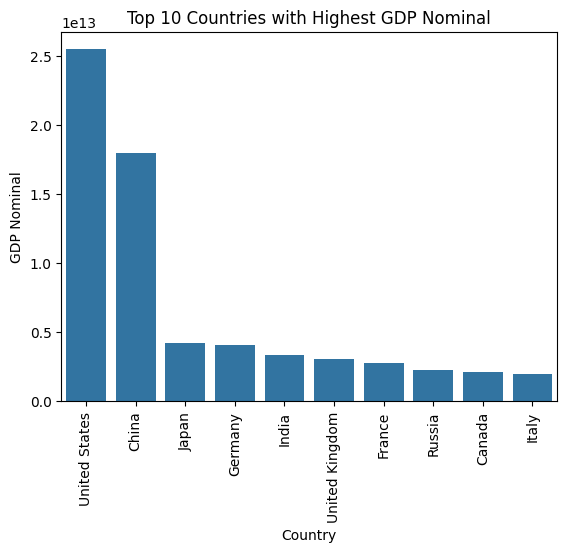

In [85]:
sns.barplot(x='Country', y='GDP_nominal_2022($)', data=data)
plt.title('Top 10 Countries with Highest GDP Nominal')
plt.xlabel('Country')
plt.ylabel('GDP Nominal')
plt.xticks(rotation=90)
plt.show()